# The normal equation

In [1]:
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

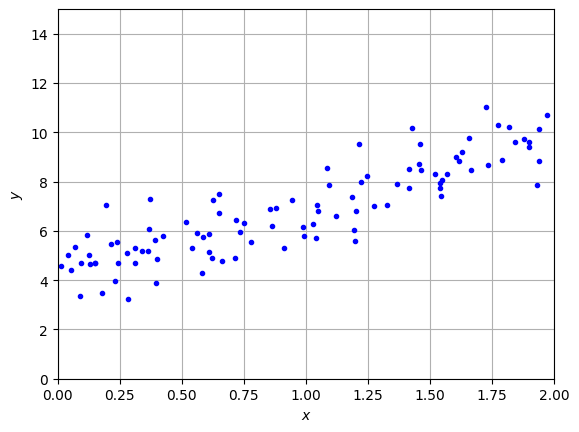

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [3]:
#create x0 = 1 to each X (in the same row)
X_b = np.c_[np.ones((100, 1)), X]

print(X_b.shape)
print(y.shape)

print(
    (X_b.T.dot(X_b)) .dot(X_b.T).dot(y).shape
    #2x100 * 100x2 = 2x2
    #2x2 * 2x100 = 2x100
    #2x100 * 100x1 = 2x1
)

# 0 = (Xt * X)^-1 *Xt * y
theta_best = np.linalg.inv((X_b.T).dot(X_b))     .dot(X_b.T).dot(y)
theta_best

(100, 2)
(100, 1)
(2, 1)


array([[4.21509616],
       [2.77011339]])

In [4]:
# lets make prediction using theta_best
X_new = np.array([[0], [2]]) # limits from the set
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

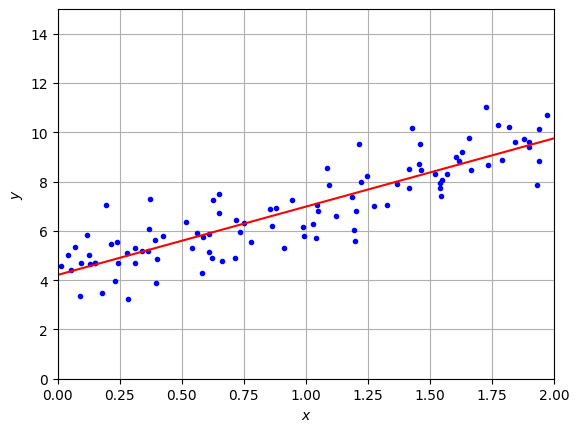

In [5]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
# using scikit

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradient descent

In [10]:
#∇ MSE(0) = 2/m * Xt * (X*0 - y)

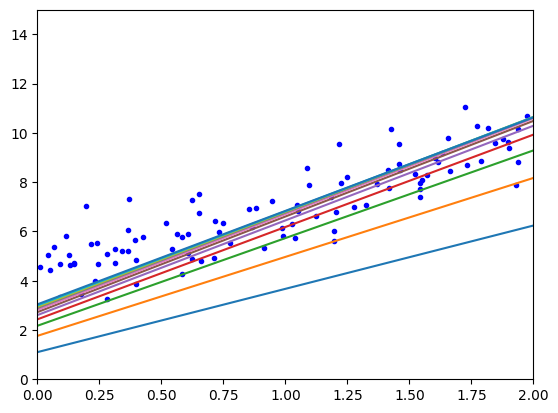

In [11]:
eta = 0.1 #  (eta is n~ in the formula), learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration <= 10:
        plt.plot(X_new, X_new_b.dot(theta))
    

# Stochastic Gradient Descent

In [12]:
# picks a random instance in the training set and computes gradients based on that istance
# fast, but less regular. cost function bounces up and down
# when closer to minimum, bounces there but never settle down
# final value is good but not optimal
# helps when function irregular
# simulated annealing - name from annealing (cooling down molten metal)
# if gets local minimum too quickly - you get stuck

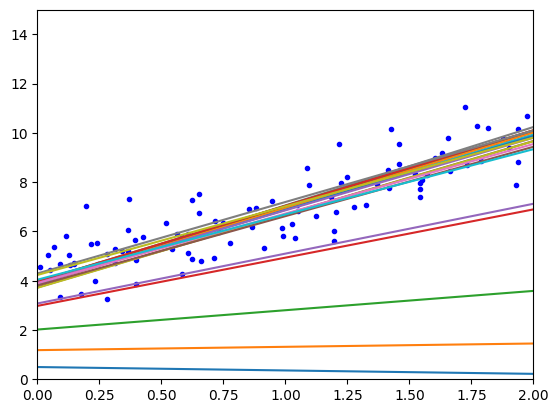

In [13]:
n_epochs = 50
m = 100
t0, t1 = 5, 50 # learning schedule hyperparameters
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization


for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: 
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.show()


In [14]:
theta

array([[4.21076011],
       [2.74856079]])

In [15]:
from sklearn.linear_model import SGDRegressor

# 1000 epochs, or until loss drops less by 1e-3,   starting point eta0 = 0.1
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

# Mini-batch gradient descent

## NO CODE IN NOTEBOOK, idk but mine maybe works

In [16]:

mini_batch_size = 15
mini_batch_indecies = np.random.choice(np.arange(0, 99), size=mini_batch_size, replace=False)
X_mini_batch = X[mini_batch_indecies]
y_mini_batch = y[mini_batch_indecies]

In [17]:
#create x0 = 1 to each X (in the same row)
X_b_mini = np.c_[np.ones((mini_batch_size, 1)), X_mini_batch]

print(X_b_mini.shape)
print(y_mini_batch.shape)

print(
    (X_b_mini.T.dot(X_b_mini)) .dot(X_b_mini.T).dot(y_mini_batch).shape
    #2x100 * 100x2 = 2x2
    #2x2 * 2x100 = 2x100
    #2x100 * 100x1 = 2x1
)

(15, 2)
(15, 1)
(2, 1)


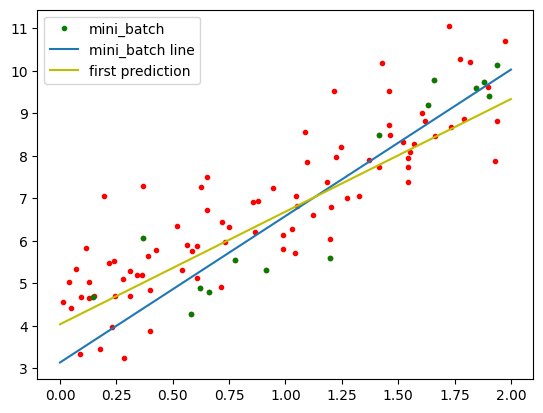

In [18]:
eta = 0.1 #  (eta is n~ in the formula), learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
X_new = np.array([[0], [2]]) # limits from the set
X_new_b = np.c_[np.ones((2, 1)), X_new]


plt.plot(X, y, "r.")
plt.plot(X_mini_batch, y_mini_batch, "g.", label="mini_batch")

for iteration in range(n_iterations):
    gradients = 2/m * X_b_mini.T.dot(X_b_mini.dot(theta) - y_mini_batch)
    theta = theta - eta * gradients


plt.plot(X_new, X_new_b.dot(theta), label="mini_batch line")   
plt.plot(X_new, y_predict, "y-", label="first prediction")
plt.legend()
plt.show()

# Polynomial Regression

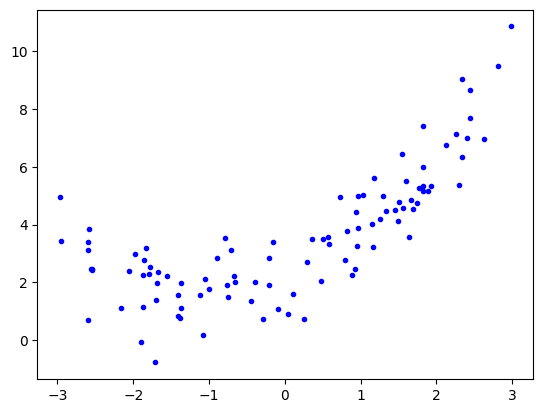

In [19]:
# not a straight line
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0]) # original feature plus square (degree = 2) of that feature

[-0.99822962]
[-0.99822962  0.99646238]


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# we got y = 0.58*X^2  +  0.93*X  +  1.49
# original = 0.50*X^2  +  1.00*X  +  2.00

(array([2.18829173]), array([[1.03507187, 0.48815927]]))

(100, 1)


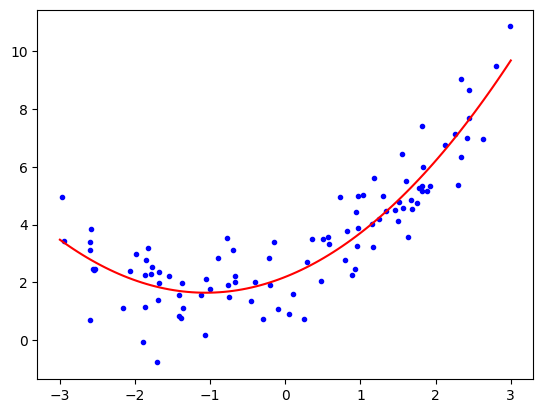

In [22]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
print(X_new.shape)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r")
plt.show()


# Learning curves

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("set size")
    plt.ylabel("RMSE")

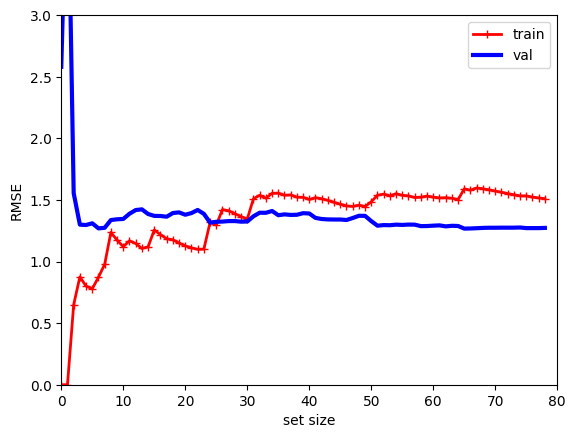

In [24]:
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 3])
plot_learning_curves(lin_reg, X, y)

In [25]:
# training data starts at 0. then it stabilizes and doesn't go up
# validation data starts with big RMSE and gradually decreases it

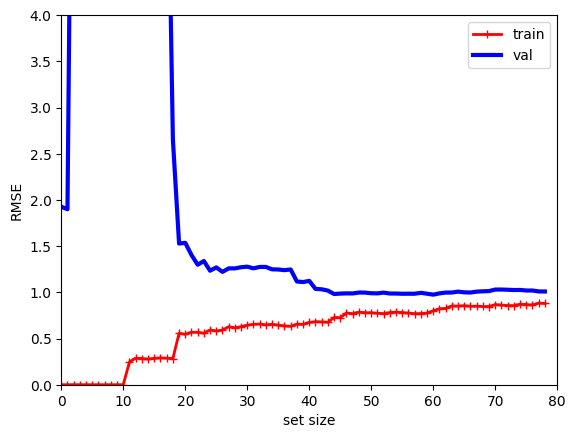

In [26]:
from sklearn.pipeline import Pipeline

# 10 degree
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plt.axis([0, 80, 0, 4])
plot_learning_curves(polynomial_regression, X, y)

In [27]:
# big gap so the model performs better on training data then validation

# Regularized Linear Models

## Ridge Regression

In [28]:
# hyperparameter alfa - how much you want to regularize the model. 
# Alfa = 0 - Linear Regression
# Alfa = big - flat line going through data mean

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

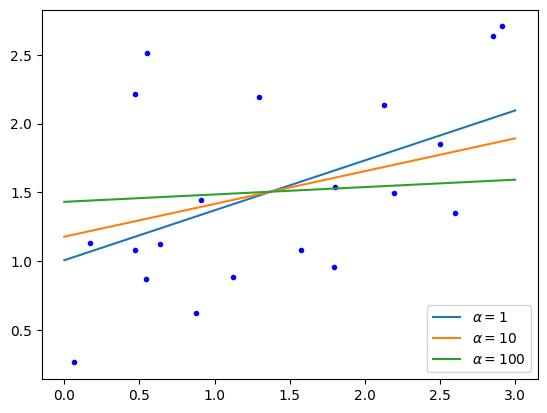

In [49]:
from sklearn.linear_model import Ridge

def create_and_plot_ridge(ALPHA):
    ridge_reg = Ridge(alpha=ALPHA, solver="cholesky")
    ridge_reg.fit(X, y)
    ridge_reg.predict([[1.5]])

    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_regul = ridge_reg.predict(X_new)
    plt.plot(X_new, y_new_regul, label=fr"$\alpha = {ALPHA}$")


plt.plot(X, y, "b.")
create_and_plot_ridge(1)
create_and_plot_ridge(10)
create_and_plot_ridge(100)
plt.legend()
plt.show()

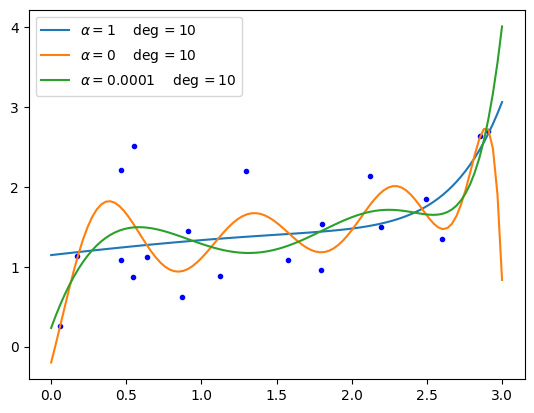

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def create_and_plot_ridge_polyn(ALPHA, DEGREE):
    ridge_reg = Ridge(alpha=ALPHA, solver="cholesky")
    ridge_reg.fit(X,y)
    
    model = make_pipeline(
                PolynomialFeatures(degree=DEGREE, include_bias=False),
                StandardScaler(),
                ridge_reg)
    
    model.fit(X, y)
    model.predict([[1.5]])

    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul, label=fr"$\alpha = {ALPHA}$    $\deg = {DEGREE}$")

plt.plot(X, y, "b.")
create_and_plot_ridge_polyn(1, 10)
create_and_plot_ridge_polyn(0, 10)
create_and_plot_ridge_polyn(0.0001, 10)

plt.legend()
plt.show()

In [41]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46728082])

## Lasso Regression

In [76]:
# Least Absolute Shrinkage and Selection Operator Regression
from sklearn.linear_model import Lasso


array([1.53788174])

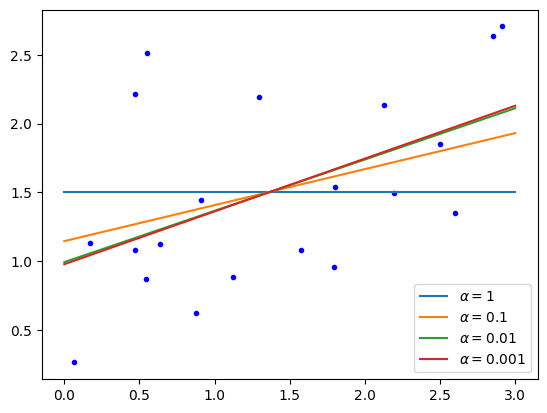

In [80]:
def create_and_plot_lasso(ALPHA):
    lasso_reg = Lasso(alpha=ALPHA)
    lasso_reg.fit(X, y)
    lasso_reg.predict([[1.5]])

    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_regul = lasso_reg.predict(X_new)
    plt.plot(X_new, y_new_regul, label=fr"$\alpha = {ALPHA}$")


plt.plot(X, y, "b.")
create_and_plot_lasso(1)
create_and_plot_lasso(0.1)
create_and_plot_lasso(0.01)
create_and_plot_lasso(0.001)
plt.legend()
plt.show()

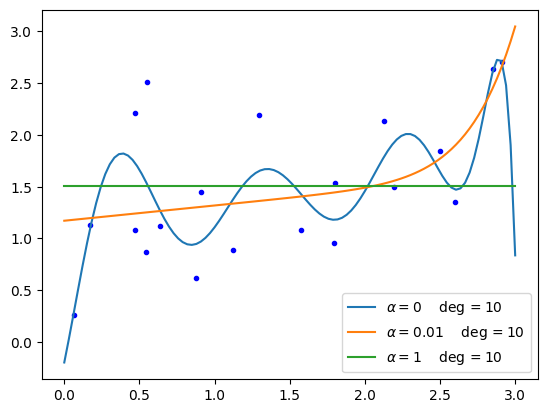

In [111]:
def create_and_plot_lasso_polyn(ALPHA, DEGREE):
    if ALPHA == 0:
        lasso_reg = LinearRegression()
    else:
        lasso_reg = Lasso(alpha=ALPHA)
    
    lasso_reg.fit(X, y)
    lasso_reg.predict([[1.5]])
    
    model = make_pipeline(
                PolynomialFeatures(degree=DEGREE, include_bias=False),
                StandardScaler(),
                lasso_reg)
    
    model.fit(X, y)
    model.predict([[1.5]])

    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul, label=fr"$\alpha = {ALPHA}$    $\deg = {DEGREE}$")

plt.plot(X, y, "b.")
create_and_plot_lasso_polyn(0, 10)
create_and_plot_lasso_polyn(1e-2, 10)
create_and_plot_lasso_polyn(1, 10)
plt.legend()
plt.show()

## Elastic Net

In [ ]:
# mix ratio - r
# r = 0 - ridge regression
# r = 1 - lasso regression

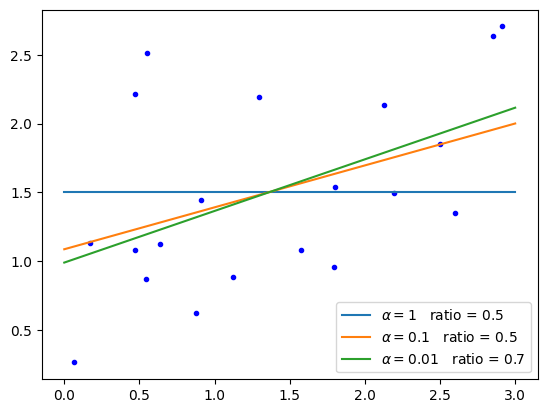

In [121]:
from sklearn.linear_model import ElasticNet

def create_and_plot_elastic_net(ALPHA, RATIO):
    elastic_net = ElasticNet(alpha=ALPHA, l1_ratio=RATIO)
    elastic_net.fit(X, y)
    elastic_net.predict([[1.5]])

    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_regul = elastic_net.predict(X_new)
    plt.plot(X_new, y_new_regul, label=fr"$\alpha = {ALPHA}$   ratio = {RATIO}")


plt.plot(X, y, "b.")
create_and_plot_elastic_net(1, 0.5)
create_and_plot_elastic_net(0.1, 0.5)
create_and_plot_elastic_net(0.01, 0.5)
plt.legend()
plt.show()

# Early stopping

In [122]:
# stop training as soon as the validation error reaches a minimum

In [141]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_val, y_val = X[m // 2 :], y[m // 2 :, 0]

In [142]:
from sklearn.base import clone

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [143]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

In [146]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.partial_fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

InvalidParameterError: The 'tol' parameter of SGDRegressor must be a float in the range [0.0, inf) or None. Got -inf instead.